## Importing the necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq

## Sinus rhythm - a "normal" heart rhythm

In [14]:
#Change H and gamma for sinus rhythm or arrhythmias
#gamma(HR) = 0.08804*HR - 0.06754
HR = 60
H = 3
gamma = 0.08804*HR - 0.06754

#coefficients for linear combination
alpha_1 = -0.024
alpha_2 = 0.0216
alpha_3 = -0.0012
alpha_4 = 0.12

T = 8
N = 1000

#time vector
t = np.linspace(0, T, N)

title = "Sinus rhythm"

## Sinus tachycardia - shape is "normal", but too fast

In [92]:
#Change H and gamma for sinus rhythm or arrhythmias
H = 2.848
gamma = 21

#coefficients for linear combination
alpha_1 = 0
alpha_2 = -0.1
alpha_3 = 0
alpha_4 = 0

T = 3
N = 1000

#time vector
t = np.linspace(0, T, N)

title = "Sinus tachycardia"

## Atrial flutter

In [5]:
'''
Atrial flutter causes a rapid rate of contraction of
the atria, usually between 200 and 350 beats/min. However,
because one side of the atria is contracting while the
other side is relaxing, the amount of blood pumped by the
atria is reduced.
'''

#Change H and gamma for sinus rhythm or arrhythmias
H = 1.52
gamma = 13

#coefficients for linear combination
alpha_1 = -0.068
alpha_2 = 0.028
alpha_3 = -0.024
alpha_4 = 0.12

T = 11
N = 1000

#time vector
t = np.linspace(0, T, N)

title = "Atrial flutter"

## Ventricular tachycardia

In [19]:
'''
heart rate 120-250 beats/min, leads to ventricular fibrillation

Guyton and Hall, Textbook of Medical Physiology, 2021

Ventricular tachycardia is usually a serious condition
for two reasons. First, this type of tachycardia usually
does not occur unless considerable ischemic damage is
present in the ventricles. Second, ventricular tachycardia
frequently initiates the lethal condition of ventricular
fibrillation because of rapid repeated stimulation of the
ventricular muscle
'''

#Change H and gamma for sinus rhythm or arrhythmias
H = 2.178
gamma = 21

#coefficients for linear combination
alpha_1 = 0
alpha_2 = 0
alpha_3 = 0
alpha_4 = -0.1

T = 4.4
N = 1000

#time vector
t = np.linspace(0, T, N)

title = "Ventricular tachycardia"

## Ventricular flutter

In [23]:
'''
heart rate over 250-350 beats/min, leads to ventricular fibrillation
'''

#Change H and gamma for sinus rhythm or arrhythmias
H = 2.178
gamma = 13

#coefficients for linear combination
alpha_1 = 0.1
alpha_2 = -0.02
alpha_3 = -0.01
alpha_4 = 0

T = 6.5
N = 1000

#time vector
t = np.linspace(0, T, N)

title = "Ventricular flutter"

## Solving the system of DE's

In [25]:
#rewriting the system so Python can understand it
def dSdt(t, S):
    global H
    global gamma

    #C and beta DO NOT CHANGE. System is stable for every C in [0,sqrt(2)]
    C = 1.35
    beta = 4

    x1, x2, x3, x4 = S
    return [gamma*(x1 - x2 - C*x1*x2 - x1*(x2**2)),
            gamma*(H*x1 - 3*x2 + C*x1*x2 + x1*(x2**2) + beta*(x4-x2)),
            gamma*(x3 - x4 - C*x3*x4 - x3*(x4**2)),
            gamma*(H*x3 - 3*x4 + C*x3*x4 + x3*(x4**2) + 2*beta*(x2-x4))]

#initial conditions
#stationary point is at 0,0,0,0 so we have to give it an initial "kick"
x1_0 = 0
x2_0 = 0
x3_0 = 0.1
x4_0 = 0

#initial condition vector
S_0 = (x1_0, x2_0, x3_0, x4_0)

#solving the ODE's
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)
#LSODA

#extracting the results
x1_sol = sol.T[0]
x2_sol = sol.T[1]
x3_sol = sol.T[2]
x4_sol = sol.T[3]

#the final solution
EKG = alpha_1*x1_sol + alpha_2*x2_sol + alpha_3*x3_sol + alpha_4*x4_sol

## Plotting the individual oscillators

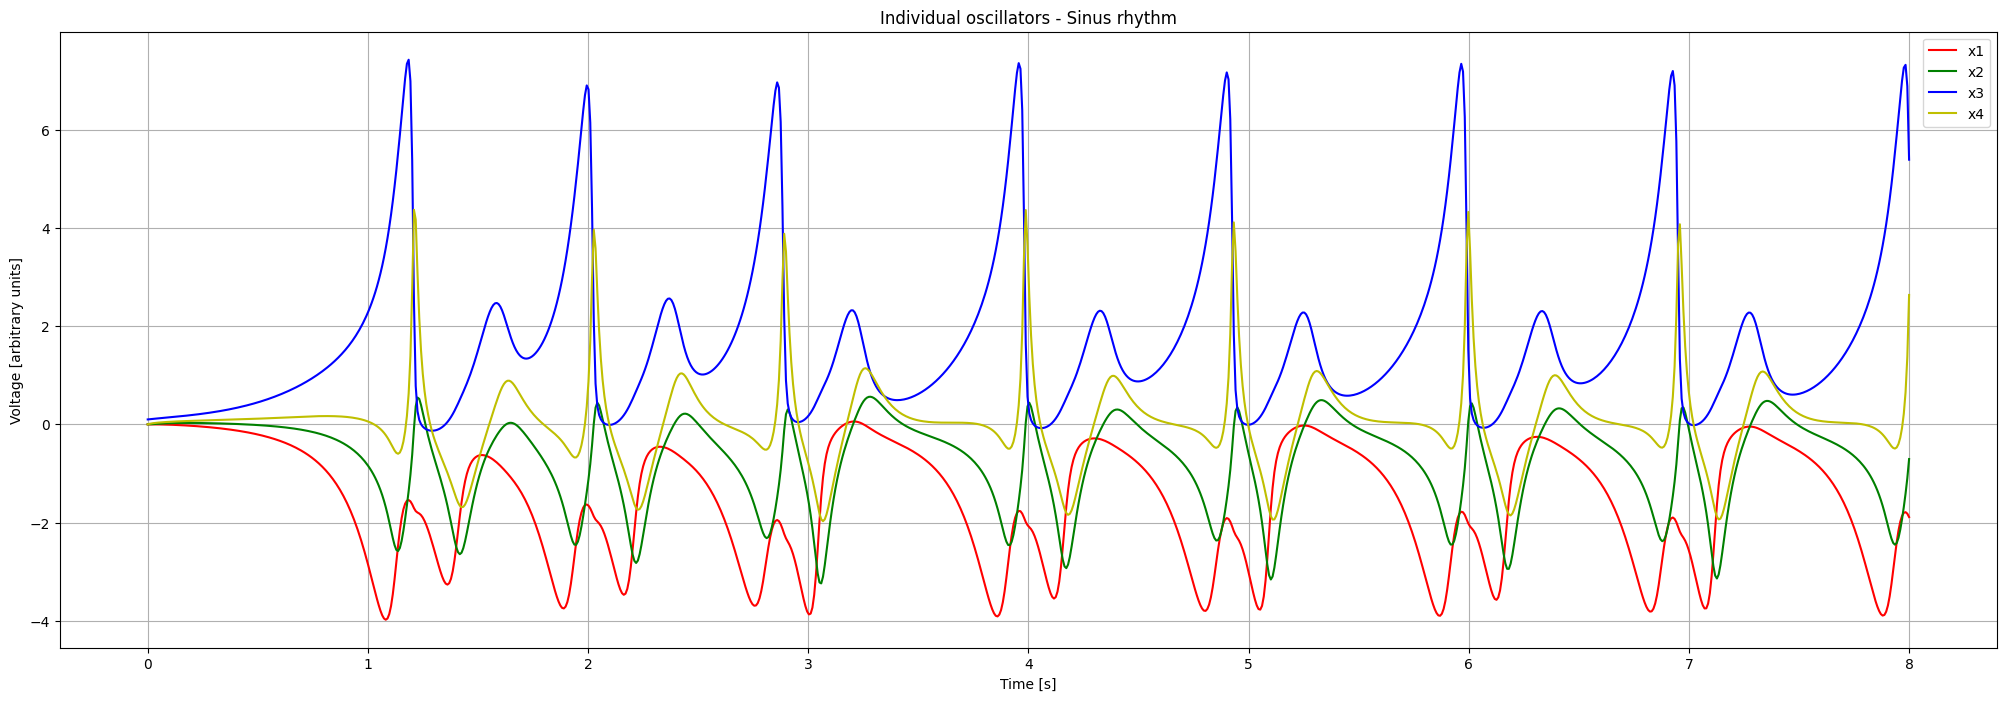

In [9]:
#wow pretty pictures :-)
plt.figure(figsize=(25,8))
plt.plot(t, x1_sol, color="r")
plt.plot(t, x2_sol, color="g")
plt.plot(t, x3_sol, color="b")
plt.plot(t, x4_sol, color="y")

plt.legend(['x1','x2','x3','x4'])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [arbitrary units]")
plt.title(f"Individual oscillators - {title}")
plt.grid()
plt.show()

## Plotting the linear combination

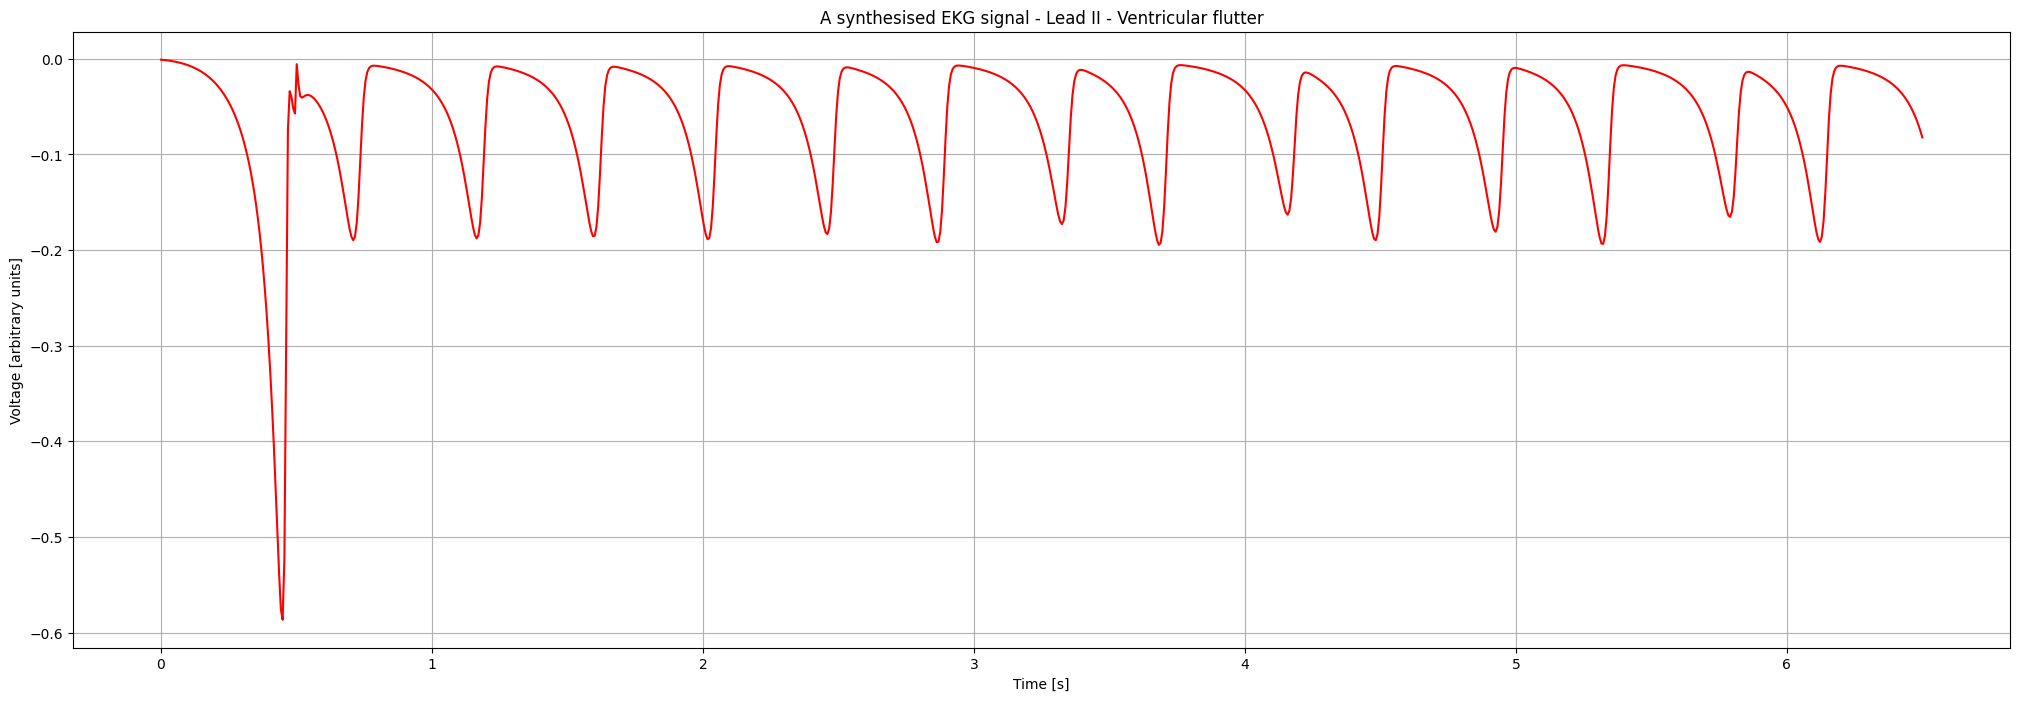

In [26]:
#wow pretty pictures :-)
plt.figure(figsize=(25,8))

figure = plt.plot(t, EKG, color="r")

plt.xlabel("Time [s]")
plt.ylabel("Voltage [arbitrary units]")
plt.title(f"A synthesised EKG signal - Lead II - {title}")
plt.grid()
plt.show()
#plt.savefig("myECGplot.png")

## Frequency spectrum of EKG signal

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/fourier_transform1.ipynb

Discrete Fourier Transform (Discrete Time, Discrete Frequency)

Here we consider a discrete time series $x_t$ that's measured for a finite amount of time ($N$ measurements over a time $T$ implies $N\Delta t = T$). The Fourier transform here is **defined** as

$$\hat{x}(f_n) = \sum_{k=0}^{N-1} x_t e^{-2 \pi i f_n (k \Delta t)} \hspace{10mm} f_n=\frac{n}{N\Delta t}$$

where $f_n$ are the so-called Fourier frequencies. The notation can be simplified as

$$\hat{x}_n = \sum_{k=0}^{N-1} x_t e^{-2 \pi i kn/N}$$


Note we get $\hat{x}_n = \hat{x}_{n \pm N} = \hat{x}_{n \pm 2N} = ...$ with this definition. With this we can restrict ourselves from $n=0$ to $n=N-1$ and not lose any information OR we can also restrict ourselves to

* In the case that $N$ is even, $n=-N/2$ to $n=N/2-1$
* In the case that $N$ is odd, $n=-(N-1)/2$ to $(N-1)/2$

This is precisely what scipy does, returning an array $\hat{x}_n$ corresponding to the frequencies

`f = [0, 1, ...,   N/2-1,     -N/2, ..., -1] / (dt*N)   if N is even`

`f = [0, 1, ..., (N-1)/2, -(N-1)/2, ..., -1] / (dt*N)   if N is odd`

Why does it do this? Well typically one deals with real time series $x_t$, and there's a handy identity

$$\hat{x}_n = \hat{x}_{-n}^*$$

so one only needs to look at the first half of the frequencies to know everything about the Fourier transform $\hat{x}_n$.

In [27]:
#time between two points on our EKG plot - EKG(t) - it's a (sometimes periodic) discrete function in time
dt = np.diff(t)[0]

#array/vector of frequencies
f = fftfreq(len(t), dt)

#handy identity
f = f[:N//2]

#computing the FFT of our EKG signal
ekgFFT = fft(EKG)

#handy identity
ekgFFT = ekgFFT[:N//2]

samplingFrequency = N/T
nyquistFrequency = samplingFrequency / 2
dF = samplingFrequency / N

#I want to plot up to upperCutoffFrequency Hz
upperCutoffFrequency = 62.5
#points per hertz
k = N / (2*samplingFrequency)
#number of samples to take
upperPointLimit = round(k*upperCutoffFrequency*2)

#taking into account frequencies up to 1kHz
f = f[:upperPointLimit]
ekgFFT = ekgFFT[:upperPointLimit]

magnitude = np.abs(ekgFFT)
phase = np.angle(ekgFFT)

print(f"Number of points: {N}\nSampling frequency: {samplingFrequency} Hz\nNyquist frequency: {nyquistFrequency} Hz\nFrequency step: {dF} Hz")
print(f"\nPlotting up to {upperCutoffFrequency} Hz")

Number of points: 1000
Sampling frequency: 153.84615384615384 Hz
Nyquist frequency: 76.92307692307692 Hz
Frequency step: 0.15384615384615383 Hz

Plotting up to 62.5 Hz


## Plotting the amplitude and phase spectra

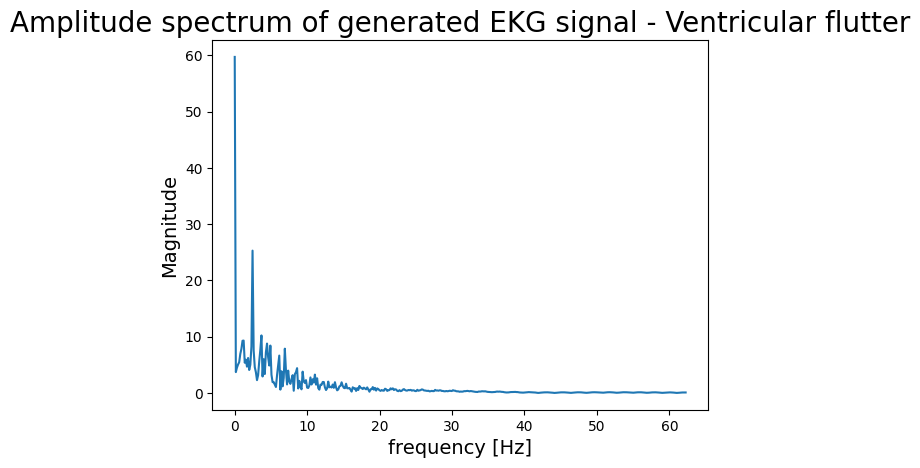

In [28]:
plt.plot(f, magnitude)
plt.xlabel("frequency [Hz]", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)

#Show the Nyquist limit - careful, scales the plot!!!
#plt.axvline(1/(2*dt), ls='--', color='k')

plt.title(f"Amplitude spectrum of generated EKG signal - {title}", fontsize=20)
plt.show()

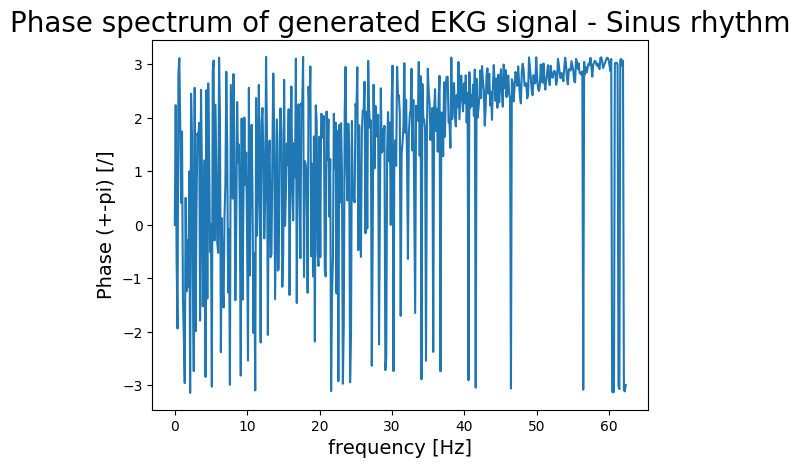

In [18]:
plt.plot(f, phase)
plt.xlabel("frequency [Hz]", fontsize=14)
plt.ylabel("Phase (+-pi) [/]", fontsize=14)

#Show the Nyquist limit - careful, scales the plot!!!
#plt.axvline(1/(2*dt), ls='--', color='k')

plt.title(f"Phase spectrum of generated EKG signal - {title}", fontsize=20)
plt.show()